In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Section 1

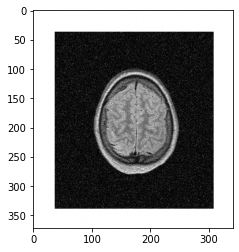

In [2]:
mri_noisy = cv.imread('./MRI_Noisy.png', cv.IMREAD_GRAYSCALE)
plt.imshow(mri_noisy, cmap='gray');

## Section 2

#### `0:25` and `0:100`

(250, 255)

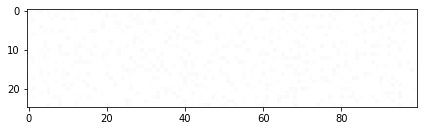

In [3]:
tmp = mri_noisy[:25, :100]
plt.figure(figsize=(7, 15))
plt.imshow(tmp, cmap='gray', vmin=0, vmax=255);
np.min(tmp), np.max(tmp)

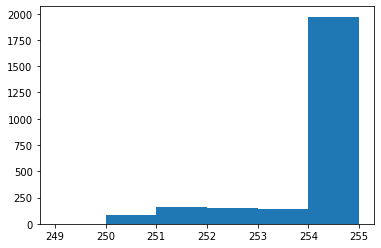

In [4]:
plt.hist(tmp.ravel(), 6,[249, 249+6]);

#### `0:25` and `100:200`

(250, 255)

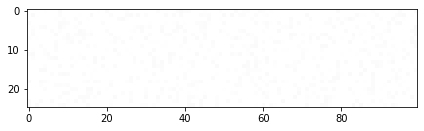

In [5]:
tmp = mri_noisy[:25, 100:200]
plt.figure(figsize=(7, 15))
plt.imshow(tmp, cmap='gray', vmin=0, vmax=255);
np.min(tmp), np.max(tmp)

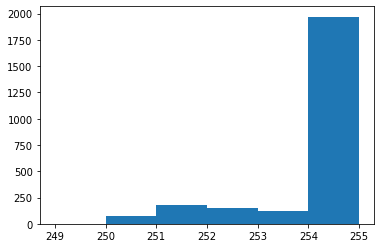

In [6]:
plt.hist(tmp.ravel(), 6,[249, 249+6]);

مشابه هیچ توزیعی نیست اما توزیع خودش را دارد و میتوان تابع را بدست آورد

## Section 3

(0, 131)

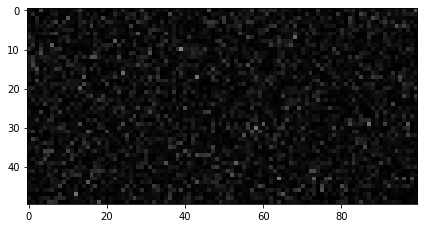

In [7]:
tmp = mri_noisy[50:100, 50:150]
plt.figure(figsize=(7, 15))
plt.imshow(tmp, cmap='gray', vmin=0, vmax=255);
np.min(tmp), np.max(tmp)

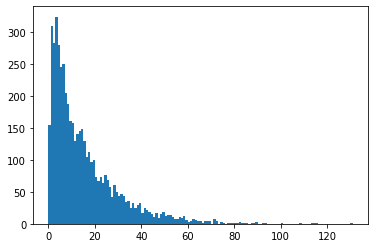

In [8]:
plt.hist(tmp.ravel(),131);

همانند توزیع گاما هست

## Section 4

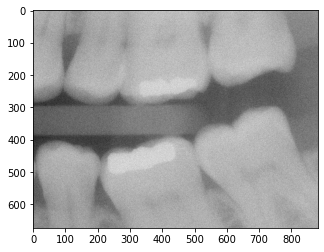

In [9]:
dentalxray_noisy = cv.imread('./DentalXray_Noisy.png', cv.IMREAD_GRAYSCALE)
plt.imshow(dentalxray_noisy, cmap='gray');

## Section 5

In [10]:
kernel_size = 7
padding = 3

In [11]:
padded_dentalxray_noisy = np.pad(dentalxray_noisy, ((padding, padding), (padding, padding)), 'constant', constant_values=(0, 0))

In [12]:
mean_matrix = np.zeros_like(dentalxray_noisy, dtype=float)
var_matrix = np.zeros_like(dentalxray_noisy, dtype=float)
for i in range(mean_matrix.shape[0]):
    for j in range(mean_matrix.shape[1]):
        tmp = padded_dentalxray_noisy[i:i+kernel_size, j:j+kernel_size]
        mean_matrix[i, j] = np.mean(tmp)
        var_matrix[i, j] = np.var(tmp)
noise_var = np.mean(var_matrix)
var_matrix = np.where(var_matrix < noise_var, noise_var, var_matrix)

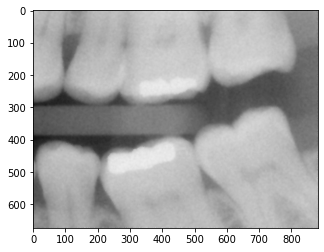

In [13]:
res = dentalxray_noisy - noise_var * np.power(var_matrix, -1) * (dentalxray_noisy - mean_matrix)
plt.imshow(res, cmap='gray')

## Section 6

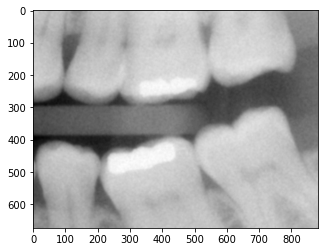

In [14]:
kernel = np.ones((7, 7)) / 49
mean_xray = cv.filter2D(dentalxray_noisy, -1, kernel)
plt.imshow(mean_xray, cmap='gray');

## Section 7

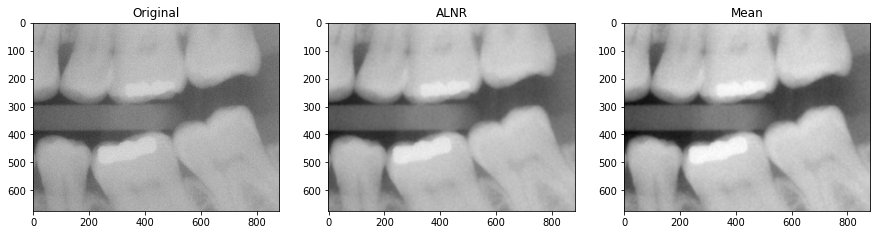

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 7))
ax[0].imshow(dentalxray_noisy, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(res, cmap='gray')
ax[1].set_title('ALNR')

ax[2].imshow(mean_xray, cmap='gray')
ax[2].set_title('Mean')
plt.show()

* both images are denoised but Mean is blurier than ALNR because of ALNR keep valuable area and is more carefull